# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

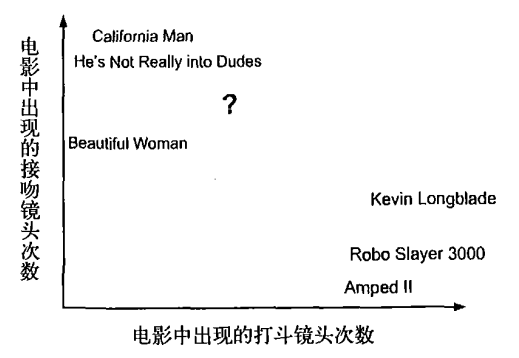

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

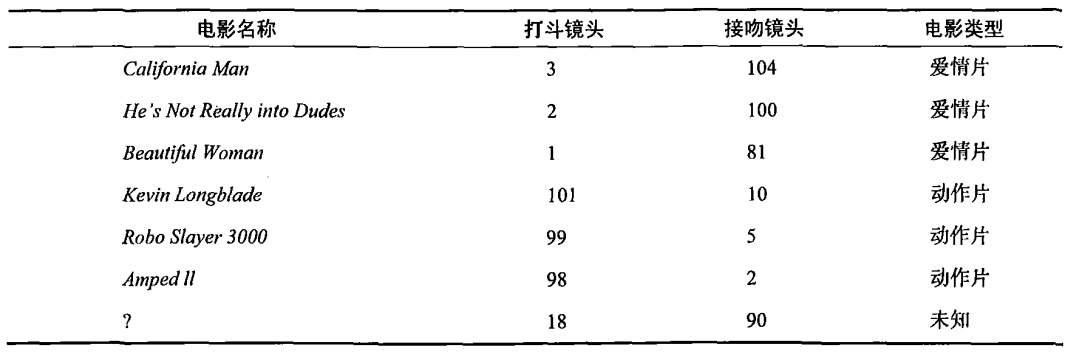

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

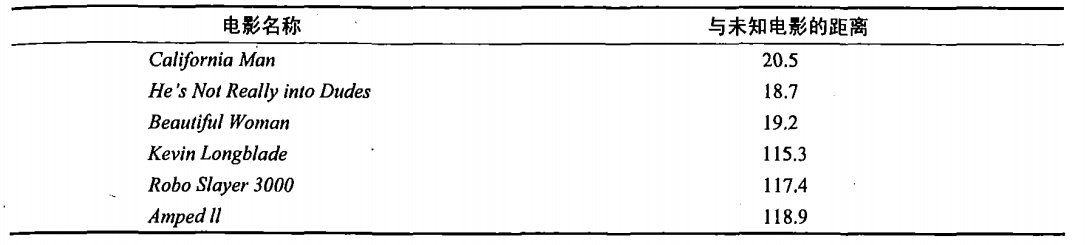

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

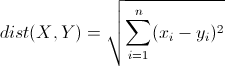

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [1]:
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train = np.array([[175,65,43],[160,50,37],[180,75,44],[175,55,40],[165,65,41]])

y_labels = ['男','女','男','女','男']

knn = KNeighborsClassifier()

In [4]:
knn.fit(X_train,y_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [5]:
#进行预测
x_test = np.array([[172,68,42]])

knn.predict(x_test)

array(['男'],
      dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据蓝蝴蝶


In [6]:
import sklearn.datasets as datasets

In [7]:
iris = datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [8]:
#获取数据

data = iris.data
target = iris.target

In [10]:
#导入拆分的工具
from sklearn.model_selection import train_test_split
#让计算机学习一部分数据，另一部分，计算机没有接触过

#让计算机预测没有接触的数据，分类，识别这些数据

In [12]:
X_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.1)

In [29]:
#训练
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
#预测数据
knn.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1])

In [16]:
#真实的结果
y_test

array([0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1])

In [28]:
x_test.shape

(15, 4)

In [26]:
knn.score(x_test,y_test)

1.0

In [30]:
knn.score(data,target)

0.97333333333333338

获取训练样本

In [36]:
data.shape

(150, 4)

In [35]:
data = iris.data

In [37]:
data = data[:,:2]
data

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

绘制图形

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

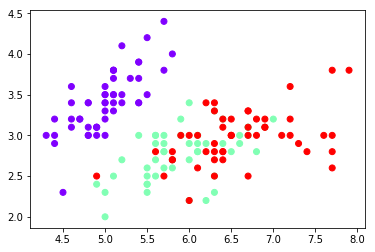

In [47]:
#c = target 代表分类
plt.scatter(data[:,0],data[:,1],c = target,cmap = 'rainbow')

定义KNN分类器

In [48]:
knn = KNeighborsClassifier(10)


第一步，训练数据

In [49]:
# 训练处理之后的数据data

knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [50]:
#提取x，y轴的范围
x_min,x_max = data[:,0].min(),data[:,0].max()

y_min,y_max = data[:,1].min(),data[:,1].max()

x = np.linspace(x_min,x_max,1000)
y = np.linspace(y_min,y_max,650)

#np.meshgrid
X,Y = np.meshgrid(x,y)

In [51]:
display(X.shape,Y.shape)

(650, 1000)

(650, 1000)

In [55]:
# X Y 就是图像中所有的点，交叉融合
#np.c_[]

a = [1,2,3]
b = [-1,-2,-5]
#
np.c_[a,b]

array([[ 1, -1],
       [ 2, -2],
       [ 3, -5]])

In [59]:
c = np.array([[4.3,4.4,4.5,4.6],[4.3,4.4,4.5,4.6],[4.3,4.4,4.5,4.6]])

d = np.array([[2,2,2,2],[2.1,2.1,2.1,2.1],[2.2,2.2,2.2,2.2]])
#展开，变成1维
cc = c.ravel()

dd = d.ravel()

np.c_[cc,dd]

array([[ 4.3,  2. ],
       [ 4.4,  2. ],
       [ 4.5,  2. ],
       [ 4.6,  2. ],
       [ 4.3,  2.1],
       [ 4.4,  2.1],
       [ 4.5,  2.1],
       [ 4.6,  2.1],
       [ 4.3,  2.2],
       [ 4.4,  2.2],
       [ 4.5,  2.2],
       [ 4.6,  2.2]])

In [60]:
xy_test = np.c_[X.ravel(),Y.ravel()]

In [61]:
xy_test.shape

(650000, 2)

对数据进行预测

In [62]:
y_ = knn.predict(xy_test)

显示数据

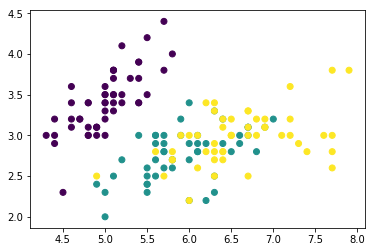

In [66]:
plt.scatter(data[:,0],data[:,1],c = target)

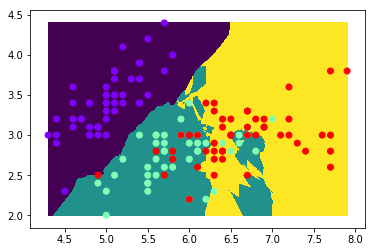

In [69]:
plt.pcolormesh(X,Y,y_.reshape(X.shape))

plt.scatter(data[:,0],data[:,1],c = target,cmap = 'rainbow')

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

获取数据

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

切片：训练数据和预测数据

生成算法

第一步：训练数据

第二步：预测数据

保存训练模型  
from sklearn.externals import joblib

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度